Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

In [40]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

from pylab import rcParams
rcParams['figure.figsize'] = 20,7
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
pd.options.display.float_format = '{:,.2f}'.format

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [3]:
len(data[data['Dataset']==2])

167

In [4]:
len(data[data['Dataset']==1])

416

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [18]:
from scipy.stats import pearsonr
pearsonr(data.Direct_Bilirubin, data.Total_Bilirubin)

(0.8746179301164133, 7.873553178026405e-185)

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [20]:
from sklearn.model_selection import train_test_split

direct_bilirubin = data.Direct_Bilirubin
total_bilirubin = data.Total_Bilirubin

X_train, X_test, y_train, y_test = train_test_split(
    direct_bilirubin,
    total_bilirubin,
    test_size = 0.2
)

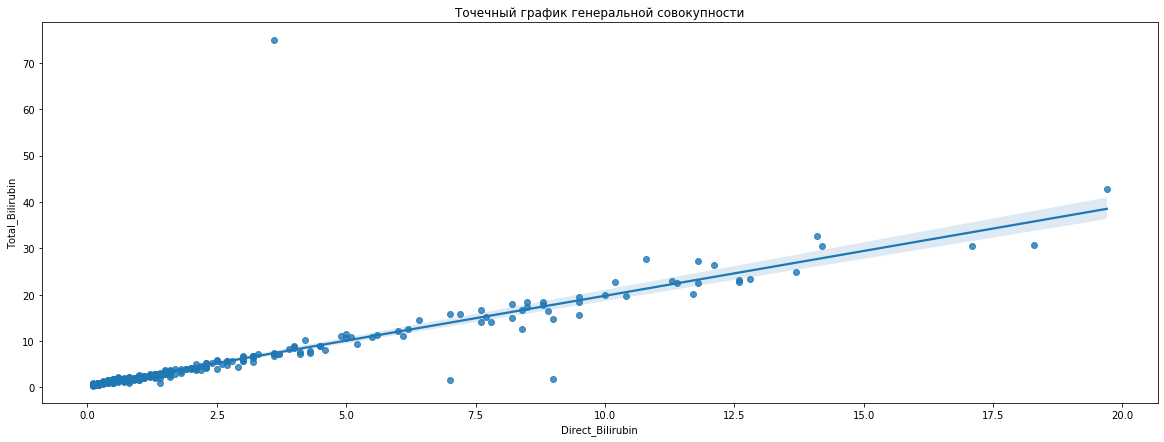

In [21]:
sns.regplot(x= direct_bilirubin, y=total_bilirubin,data=data, fit_reg=True)
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Точечный график генеральной совокупности')
plt.show()

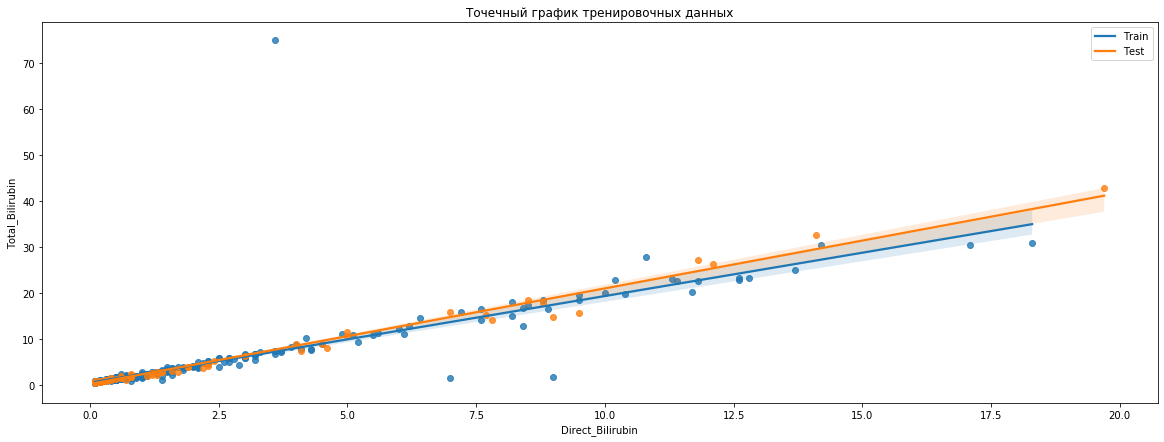

In [24]:
sns.regplot(x= X_train, y=y_train,data=data, fit_reg=True)
sns.regplot(x= X_test, y=y_test,data=data, fit_reg=True)
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.legend(['Train', 'Test'])
plt.title('Точечный график тренировочных данных')
plt.show()

Пример, как считать квантили:

In [25]:
age = data['Age']

In [26]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [27]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.00,0.70,0.10,150.00,18.00,19.00,5.10,2.00,0.55,1.00
0.25,33.00,0.80,0.20,175.50,23.00,25.00,5.80,2.60,0.70,1.00
0.50,45.00,1.00,0.30,208.00,35.00,42.00,6.60,3.10,0.93,1.00
0.75,58.00,2.60,1.30,298.00,60.50,87.00,7.20,3.80,1.10,2.00


Пример квартилей:

In [28]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.00,583.00,583.00,583.00,583.00,583.00,583.00,583.00,579.00,583.00
mean,44.75,3.30,1.49,290.58,80.71,109.91,6.48,3.14,0.95,1.29
std,16.19,6.21,2.81,242.94,182.62,288.92,1.09,0.80,0.32,0.45
min,4.00,0.40,0.10,63.00,10.00,10.00,2.70,0.90,0.30,1.00
25%,33.00,0.80,0.20,175.50,23.00,25.00,5.80,2.60,0.70,1.00
50%,45.00,1.00,0.30,208.00,35.00,42.00,6.60,3.10,0.93,1.00
75%,58.00,2.60,1.30,298.00,60.50,87.00,7.20,3.80,1.10,2.00
max,90.00,75.00,19.70,"2,110.00","2,000.00","4,929.00",9.60,5.50,2.80,2.00


Посчитать квартили для всех **колонок**. 

### Answer
выше, в методе describe

Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

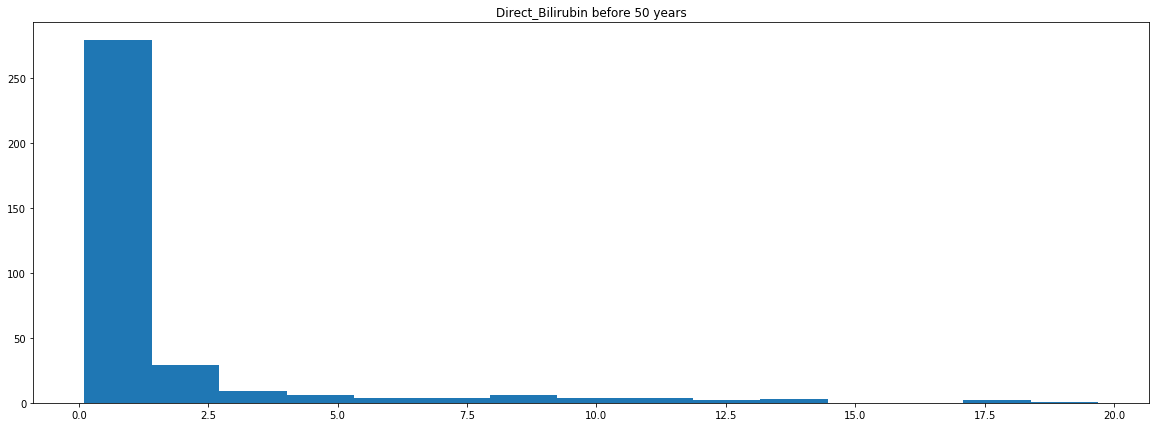

In [38]:
d_bilirubin_before_50 = data.Direct_Bilirubin[data.Age < 50]
plt.hist(d_bilirubin_before_50, 15)
plt.title('Direct_Bilirubin before 50 years')
plt.show()

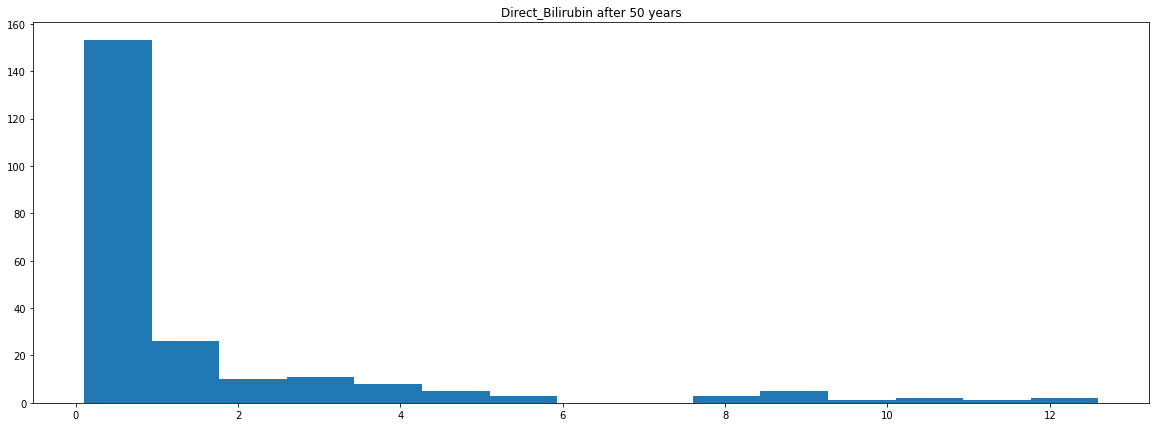

In [39]:
d_bilirubin_after_50 = data.Direct_Bilirubin[data.Age >= 50]
plt.hist(d_bilirubin_after_50, 15)
plt.title('Direct_Bilirubin after 50 years')
plt.show()

In [42]:
print(f'Mean for Direct_Bilirubin before 50 years is {statistics.mean(d_bilirubin_before_50)}')
print(f'Mean for Direct_Bilirubin after 50 years is {statistics.mean(d_bilirubin_after_50)}')

Mean for Direct_Bilirubin before 50 years is 1.4946175637393768
Mean for Direct_Bilirubin after 50 years is 1.4730434782608697


In [44]:
print(f'50% quantile for Direct_Bilirubin before 50 years is {np.quantile(d_bilirubin_before_50, 0.5)}')
print(f'50% quantile for Direct_Bilirubin after 50 years is {np.quantile(d_bilirubin_after_50, 0.5)}')

50% quantile for Direct_Bilirubin before 50 years is 0.3
50% quantile for Direct_Bilirubin after 50 years is 0.4


### Answer
В первой выборке (до 50 лет) есть выхлоп большого значения (боле 15), это выхлоп дает влияние на среднее. Поэтому у "молодой" выборки среднее больше, но по квартилю видно, что Direct_Bilirubin у "взрослой" выборки на самом деле немного больше.

In [45]:
total_bilirubin_ill = data.Total_Bilirubin[data.Dataset == 1]
stats.ttest_1samp(total_bilirubin_ill, total_bilirubin.mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

In [51]:
len(total_bilirubin_ill)-1

415

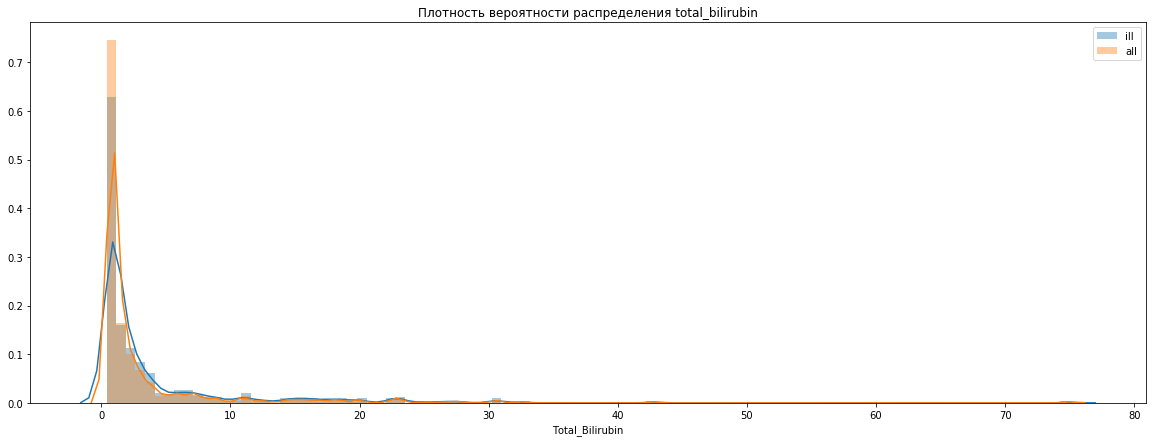

In [47]:
sns.distplot(total_bilirubin_ill, 100)
sns.distplot(total_bilirubin, 100)
plt.title('Плотность вероятности распределения total_bilirubin')
plt.legend(['ill', 'all'])
plt.show()

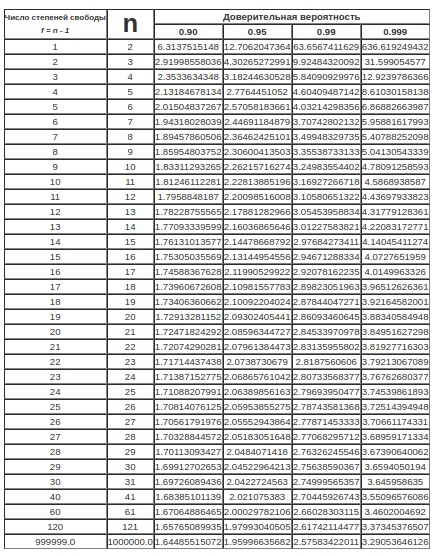

In [49]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

### Answer
t-value (2.47) превышает пороговые значения в таблице (от 1.9599... до 1.9799...) при p-value (0.013) < 0.05. Значит мы отвергаем гипотезу H0 о том, что выборка из людей с забовлеванием является репрезентативной.

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть?

In [52]:
total_bilirubin_health = data.Total_Bilirubin[data.Dataset == 2]

print(stats.ttest_ind(total_bilirubin_ill, total_bilirubin_health))

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)


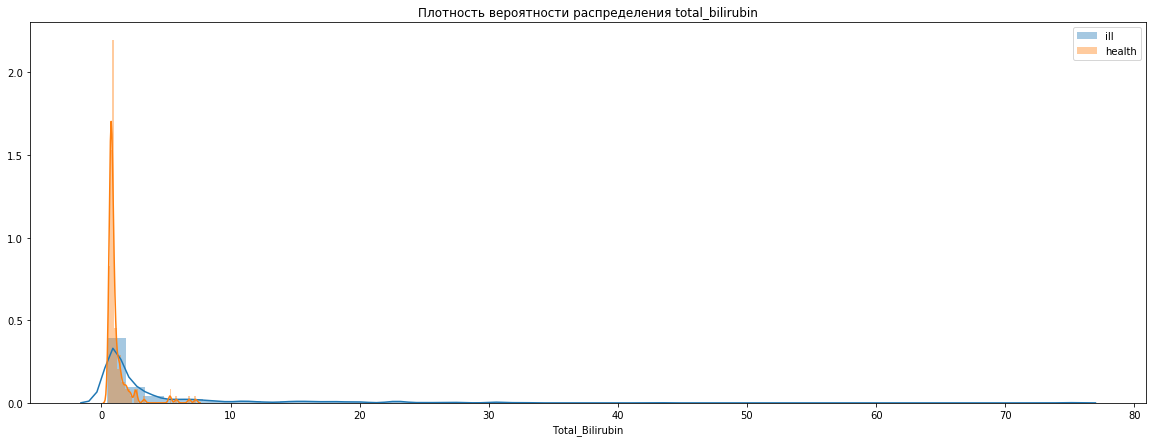

In [62]:
sns.distplot(total_bilirubin_ill)
sns.distplot(total_bilirubin_health)
plt.title('Плотность вероятности распределения total_bilirubin')
plt.legend(['ill', 'health'])
plt.show()

### Answer
По аналогии с предыдущем - группы внешне похожи, но по результатам теста их распределения различны (большое t-value при p-value << 0.05)

Посчитать статистическую значимость для **трех** выборок (по возрасту) -**тест Anova** - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [61]:
dataset_0 = data[data.Age.between(1,29)]['Dataset']

dataset_1 = data[data.Age.between(30,54)]['Dataset']

dataset_2 = data[data.Age > 54]['Dataset']

stats.f_oneway(dataset_0, dataset_1, dataset_2)

F_onewayResult(statistic=9.375048806025259, pvalue=9.837730889092287e-05)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп с разным возрастом.

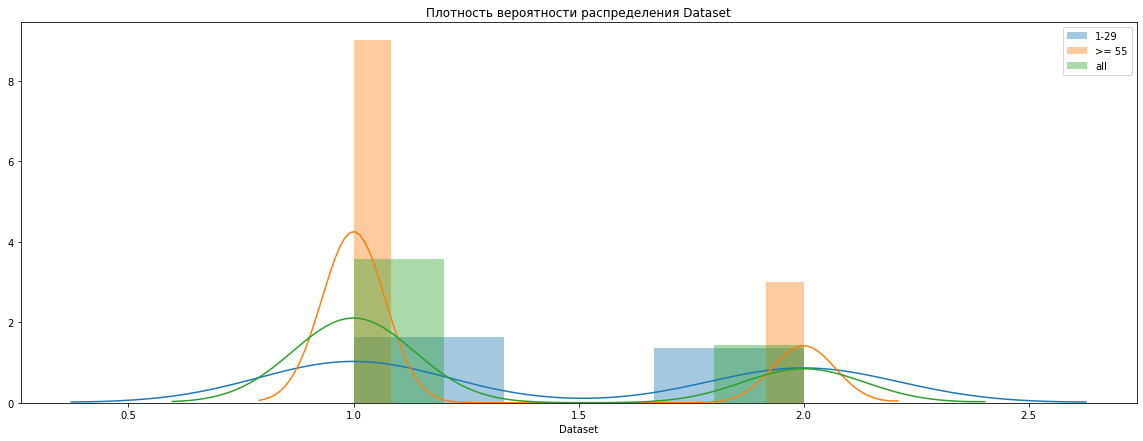

In [73]:
sns.distplot(dataset_0)
# sns.distplot(dataset_1)
sns.distplot(dataset_2)
sns.distplot(data.Dataset)
plt.title('Плотность вероятности распределения Dataset')
plt.legend(['1-29', '>= 55', 'all'])
plt.show()

(array([227.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  75.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

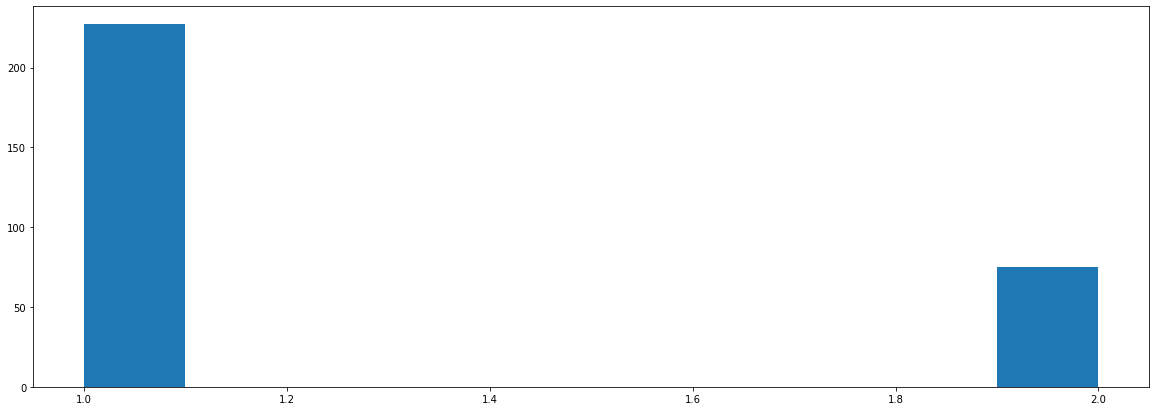

In [74]:
plt.hist(dataset_1)

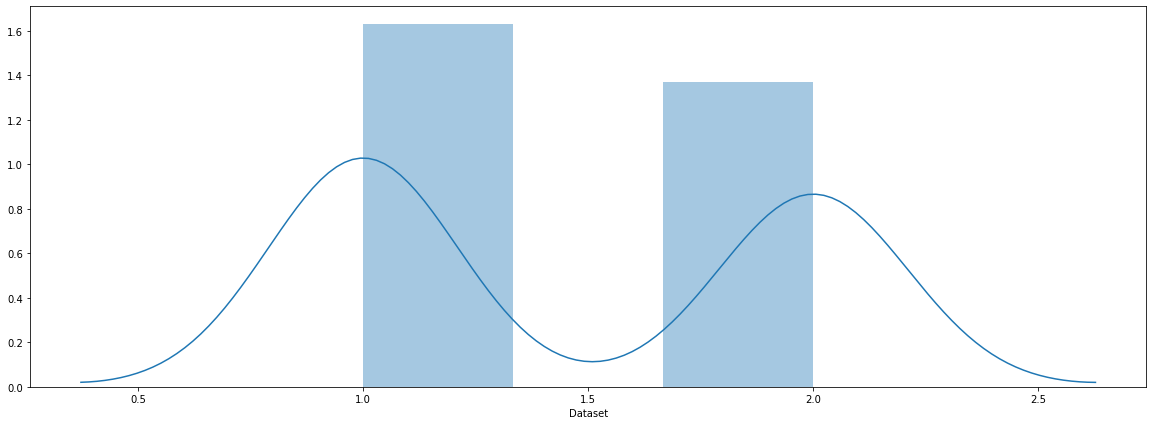

In [71]:
sns.distplot(dataset_0)